## US senato rinkimų eksploracija

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Nurodykite pilną failo kelią
file_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-senate.csv"

# Įkelkite CSV failą į pandas DataFrame
df = pd.read_csv(file_path)

# Patikrinkite pirmas kelias eilutes, kad įsitikintumėte, jog duomenys buvo įkelti teisingai
print(df.head())


   year    state state_po  state_fips  state_cen  state_ic     office  \
0  1976  ARIZONA       AZ           4         86        61  US SENATE   
1  1976  ARIZONA       AZ           4         86        61  US SENATE   
2  1976  ARIZONA       AZ           4         86        61  US SENATE   
3  1976  ARIZONA       AZ           4         86        61  US SENATE   
4  1976  ARIZONA       AZ           4         86        61  US SENATE   

    district stage  special  ... writein   mode  candidatevotes totalvotes  \
0  statewide   gen    False  ...   False  total          321236     741210   
1  statewide   gen    False  ...   False  total            1565     741210   
2  statewide   gen    False  ...   False  total          400334     741210   
3  statewide   gen    False  ...   False  total            7310     741210   
4  statewide   gen    False  ...   False  total           10765     741210   

   unofficial   version  party_simplified  partija_numeric rinkejų_aktyvumas  \
0       Fals

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3629 non-null   int64  
 1   state                3629 non-null   object 
 2   state_po             3629 non-null   object 
 3   state_fips           3629 non-null   int64  
 4   state_cen            3629 non-null   int64  
 5   state_ic             3629 non-null   int64  
 6   office               3629 non-null   object 
 7   district             3629 non-null   object 
 8   stage                3629 non-null   object 
 9   special              3629 non-null   bool   
 10  candidate            3206 non-null   object 
 11  party_detailed       3030 non-null   object 
 12  writein              3629 non-null   bool   
 13  mode                 3629 non-null   object 
 14  candidatevotes       3629 non-null   int64  
 15  totalvotes           3629 non-null   i

In [11]:
print(df.isnull().sum())

year                     0
state                    0
state_po                 0
state_fips               0
state_cen                0
state_ic                 0
office                   0
district                 0
stage                    0
special                  0
candidate              423
party_detailed         599
writein                  0
mode                     0
candidatevotes           0
totalvotes               0
unofficial               0
version                  0
party_simplified         0
partija_numeric          0
rinkejų_aktyvumas        0
kandidato_aktyvumas      0
dtype: int64


In [ ]:
print(df["party_simplified"].unique())

['REPUBLICAN' 'OTHER' 'DEMOCRAT' 'LIBERTARIAN']


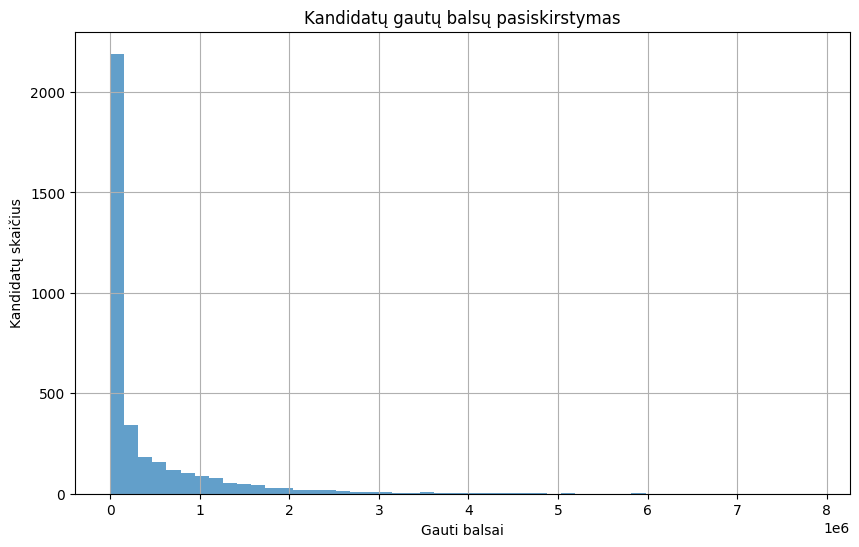

In [ ]:
# Sukuriame histogramą, kurioje matosi kandidatų gauti balsai
plt.figure(figsize=(10,6))
df["candidatevotes"].plot(kind="hist", bins=50, alpha=0.7)
plt.title("Kandidatų gautų balsų pasiskirstymas")
plt.xlabel("Gauti balsai")
plt.ylabel("Kandidatų skaičius")
plt.grid(True)
plt.show()


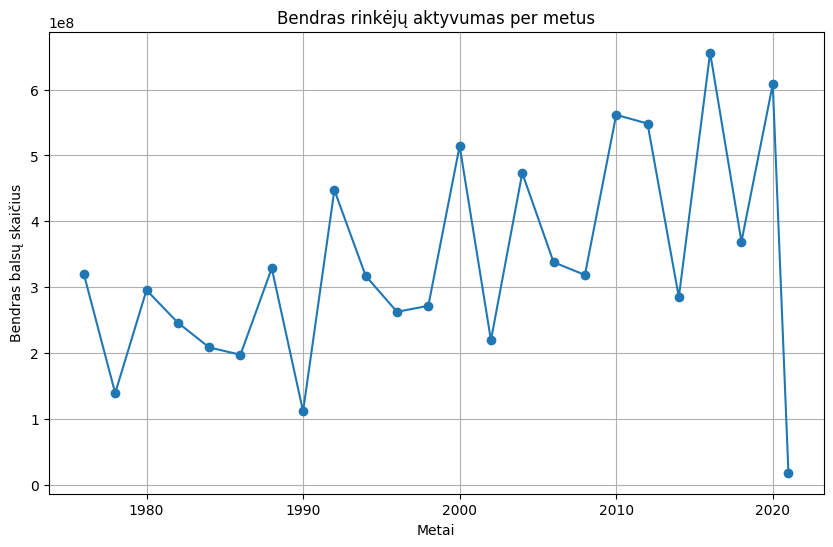

In [ ]:
# Grupavimas pagal metus ir sumuojame balsus
yearly_votes = df.groupby("year")["totalvotes"].sum().reset_index()

# Sukuriame linijinį grafiką
plt.figure(figsize=(10,6))
plt.plot(yearly_votes["year"], yearly_votes["totalvotes"], marker="o")
plt.title("Bendras rinkėjų aktyvumas per metus")
plt.xlabel("Metai")
plt.ylabel("Bendras balsų skaičius")
plt.grid(True)
plt.show()


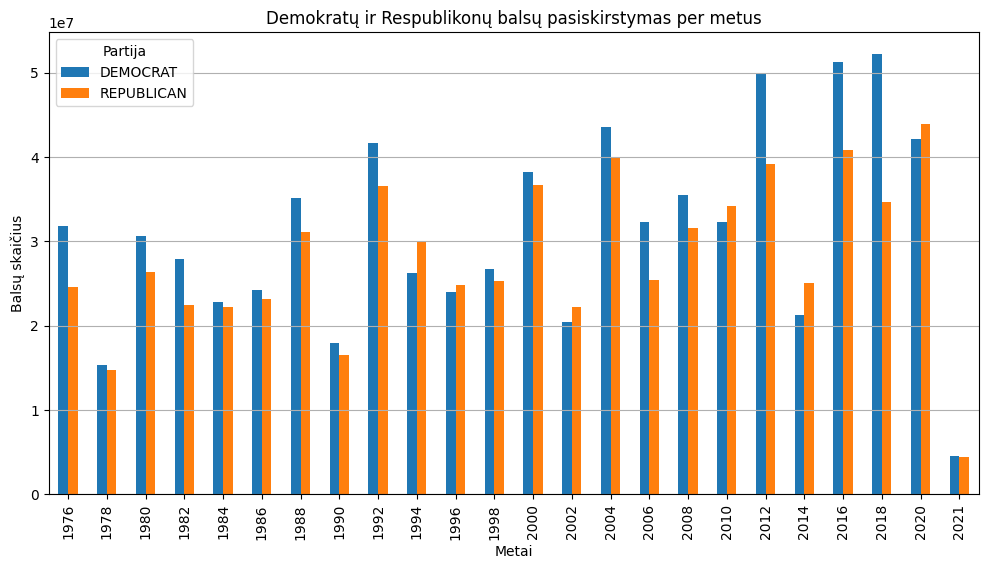

In [ ]:
# Filtruojame pagrindines partijas
main_parties = df[df["party_simplified"].isin(["DEMOCRAT", "REPUBLICAN"])]

# Grupavimas pagal metus ir partiją, sumuojame balsus
party_votes = main_parties.groupby(["year", "party_simplified"])["candidatevotes"].sum().unstack()

# Sukuriame grupuotą stulpelių diagramą
party_votes.plot(kind="bar", figsize=(12,6))
plt.title("Demokratų ir Respublikonų balsų pasiskirstymas per metus")
plt.xlabel("Metai")
plt.ylabel("Balsų skaičius")
plt.legend(title="Partija")
plt.grid(axis="y")
plt.show()


<Figure size 1000x600 with 0 Axes>

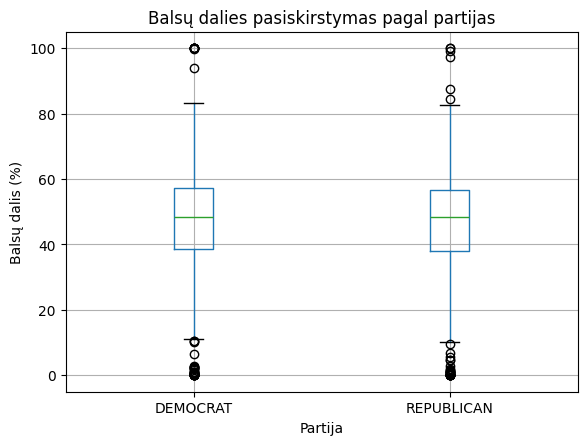

In [ ]:
# Pridedame naują stulpelį su balsų dalimi
df["vote_percentage"] = df["candidatevotes"] / df["totalvotes"] * 100

# Išfiltruojame pagrindines partijas ir sudarome "boxplot"
plt.figure(figsize=(10,6))
main_parties = df[df["party_simplified"].isin(["DEMOCRAT", "REPUBLICAN"])]
main_parties.boxplot(column="vote_percentage", by="party_simplified")
plt.title("Balsų dalies pasiskirstymas pagal partijas")
plt.suptitle("")
plt.xlabel("Partija")
plt.ylabel("Balsų dalis (%)")
plt.grid(True)
plt.show()


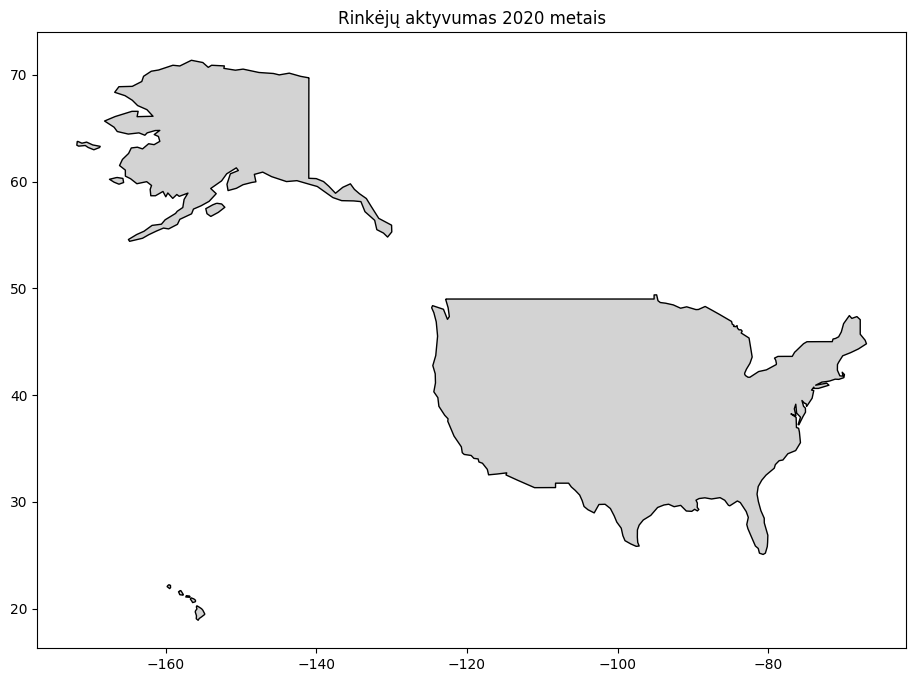

In [ ]:
import matplotlib.pyplot as plt

# Pavyzdžiui, imame 2020 metų duomenis ir susumuojame balsus pagal valstijas
year_2020 = df[df["year"] == 2020].groupby("state_po")["totalvotes"].sum().reset_index()

# Nurodykite shapefile kelią (keiskite pagal jūsų kompiuterio aplanką)
shapefile_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\zemelapiai\ne_110m_admin_0_countries.shp"

# Įkelkite duomenis iš failo
usa = gpd.read_file(shapefile_path)

# Filtruojame tik JAV
usa = usa[usa["NAME"] == "United States of America"]

# Vizualizacija su matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
usa.plot(ax=ax, color="lightgrey", edgecolor="black")

# Pridedame duomenis iš 2020 metų balsavimo (čia reikia daugiau darbo su valstijų koordinatėmis)
plt.title("Rinkėjų aktyvumas 2020 metais")
plt.show()


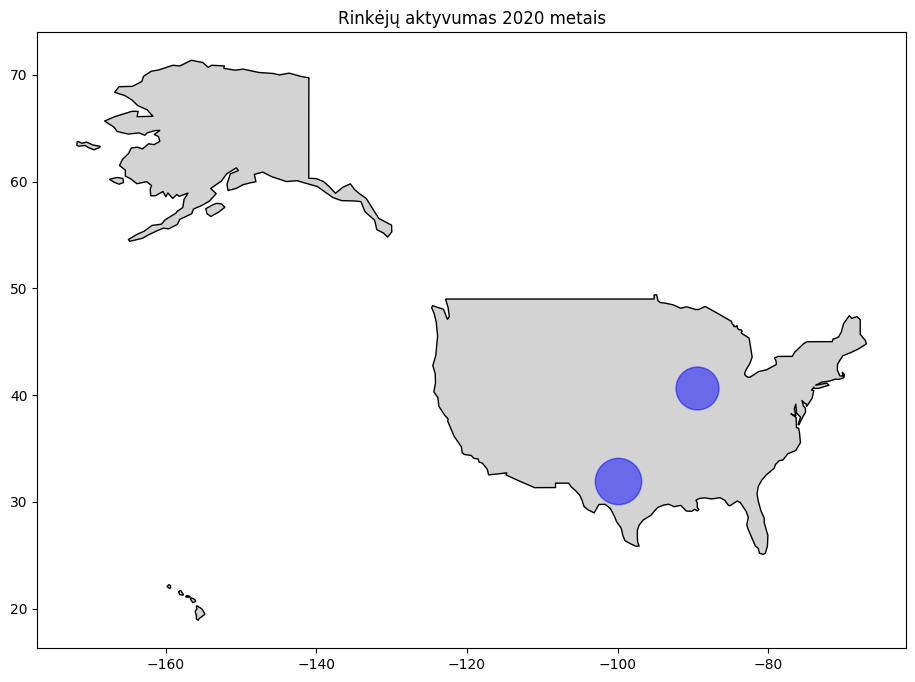

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Pavyzdžiui, imame 2020 metų duomenis ir susumuojame balsus pagal valstijas
year_2020 = df[df["year"] == 2020].groupby("state_po")["totalvotes"].sum().reset_index()

# Nurodykite shapefile kelią (keiskite pagal jūsų kompiuterio aplanką)
shapefile_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\zemelapiai\ne_110m_admin_0_countries.shp"

# Įkelkite duomenis iš failo
usa = gpd.read_file(shapefile_path)

# Filtruojame tik JAV
usa = usa[usa["NAME"] == "United States of America"]

# Vizualizacija su matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
usa.plot(ax=ax, color="lightgrey", edgecolor="black")

# Pridėkime apskritimus pagal valstijų kodus iš year_2020 duomenų
state_centers = {
    "CA": (-119.4179, 36.7783), "TX": (-99.9018, 31.9686), "FL": (-81.5158, 27.6648),
    "NY": (-74.0060, 40.7128), "IL": (-89.3985, 40.6331), "PA": (-77.1945, 41.2033),
    # Galite pridėti daugiau valstijų koordinatėmis (ilguma, platuma)
}

# Pridėkite apskritimus
for idx, row in year_2020.iterrows():
    state = row["state_po"]
    total_votes = row["totalvotes"]

    if state in state_centers:
        coords = state_centers[state]
        plt.scatter(coords[0], coords[1], s=total_votes / 50000, color="blue", alpha=0.5)

plt.title("Rinkėjų aktyvumas 2020 metais")
plt.show()


In [ ]:
# Filtruojame 2020 metų duomenis
year_2020 = df[df["year"] == 2020]

# Raskime kiekvienos valstijos laimėtoją
# Grupavimas pagal valstijos kodą ir kandidatų balsų didžiausios vertės nustatymas
winner_2020 = year_2020.loc[year_2020.groupby("state_po")["candidatevotes"].idxmax()][["state_po", "party_simplified"]]

# Sukuriame "party_numeric" stulpelį, kuris žemėlapiui priskirs skaitines reikšmes
party_map = {
    "DEMOCRAT": 1,
    "REPUBLICAN": 2,
    "OTHER": 3
}

# Pridėkite skaitines reikšmes partijoms
winner_2020["party_numeric"] = winner_2020["party_simplified"].map(party_map)

# Patikrinkite, ar "winner_2020" lentelė sukurta teisingai
print(winner_2020.head())


     state_po party_simplified  party_numeric
3426       AK       REPUBLICAN              2
3422       AL       REPUBLICAN              2
3448       AR       REPUBLICAN              2
3436       AZ         DEMOCRAT              1
3449       CO         DEMOCRAT              1


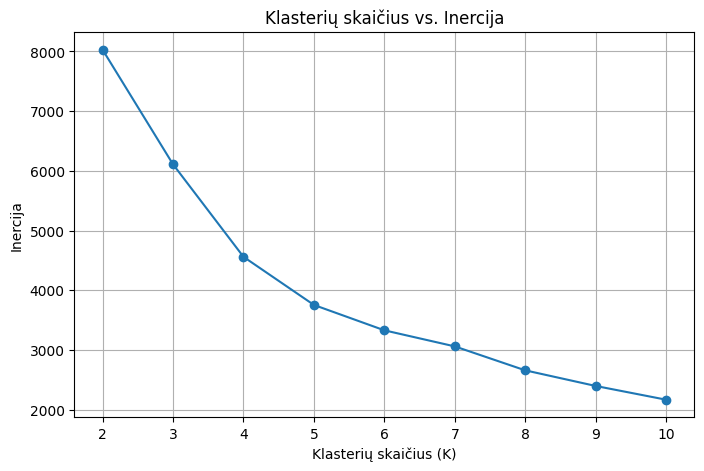

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai (galite pridėti daugiau požymių)
features = ["totalvotes", "year", "state_fips"]

# Paruoškite duomenis
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Naudokite „alkūnės metodą“ nustatyti optimalų klasterių skaičių
options = range(2, 11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

# 5. Vizualizuokite rezultatą
plt.figure(figsize=(8, 5))
plt.plot(options, inertias, "-o")
plt.title("Klasterių skaičius vs. Inercija")
plt.xlabel("Klasterių skaičius (K)")
plt.ylabel("Inercija")
plt.grid(True)
plt.show()


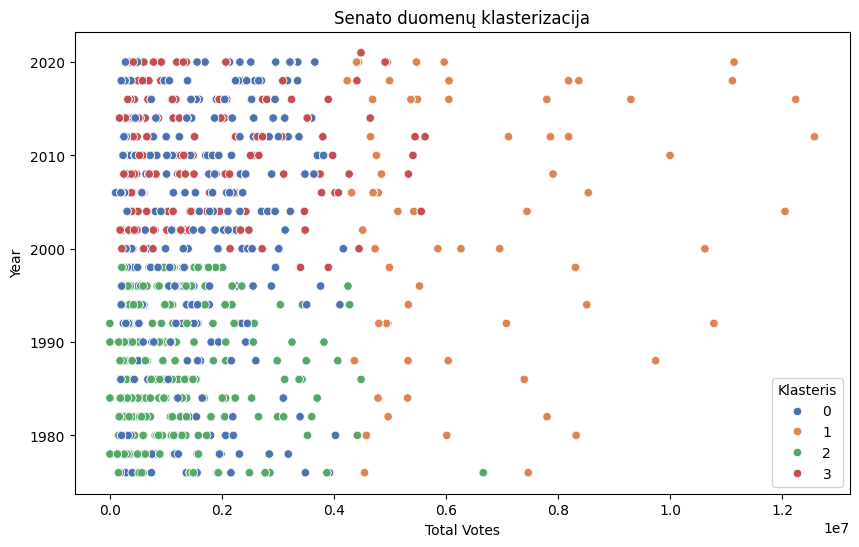

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "year", "partija_numeric"]

# Paruoškite duomenis
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite K-means modelį
kmeans = KMeans(n_clusters=4, random_state=42)  # Nustatykite klasterių skaičių
kmeans.fit(X_scaled)

# Pridėkite klasterių priskyrimą į originalius duomenis
df["cluster"] = kmeans.labels_

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="year", hue="cluster", palette="deep")
plt.title("Senato duomenų klasterizacija")
plt.xlabel("Total Votes")
plt.ylabel("Year")
plt.legend(title="Klasteris")
plt.show()


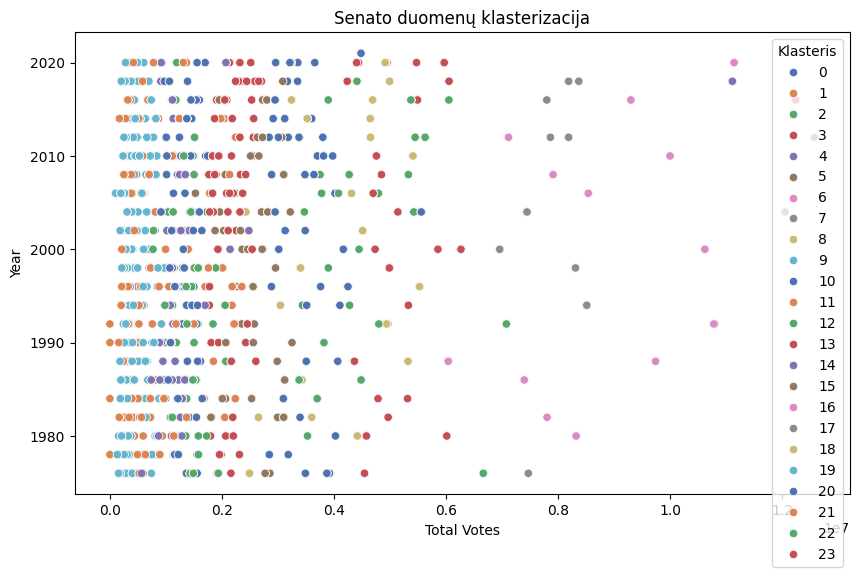

In [ ]:
# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "candidatevotes", "partija_numeric",]

# Paruoškite duomenis
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite K-means modelį
kmeans = KMeans(n_clusters=24, random_state=42)  # Nustatykite klasterių skaičių
kmeans.fit(X_scaled)

# Pridėkite klasterių priskyrimą į originalius duomenis
df["cluster"] = kmeans.labels_

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="year", hue="cluster", palette="deep")
plt.title("Senato duomenų klasterizacija")
plt.xlabel("Total Votes")
plt.ylabel("Year")
plt.legend(title="Klasteris")
plt.show()


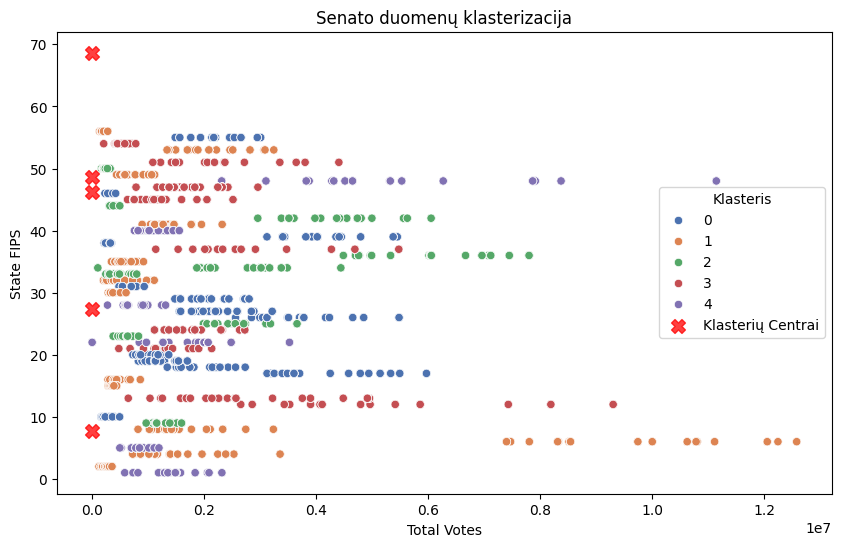

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["state_cen", "state_ic"]

# Paruoškite duomenis
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite K-means modelį
kmeans = KMeans(n_clusters=5, random_state=42)  # Nustatykite klasterių skaičių
kmeans.fit(X_scaled)

# Pridėkite klasterių priskyrimą į originalius duomenis
df["cluster"] = kmeans.labels_

# Atvirkštinė transformacija klasterių centrams į originalias reikšmes
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="state_fips", hue="cluster", palette="deep")
plt.title("Senato duomenų klasterizacija")
plt.xlabel("Total Votes")
plt.ylabel("State FIPS")

# Pridėkite klasterių centrus prie grafiko
# Naudojame tik pirmus du požymius (pakeiskite, jei reikalinga)
centers_x, centers_y = centers_original[:, 0], centers_original[:, 1]
plt.scatter(centers_x, centers_y, c="red", s=100, alpha=0.75, marker="X", label="Klasterių Centrai")

plt.legend(title="Klasteris")
plt.show()


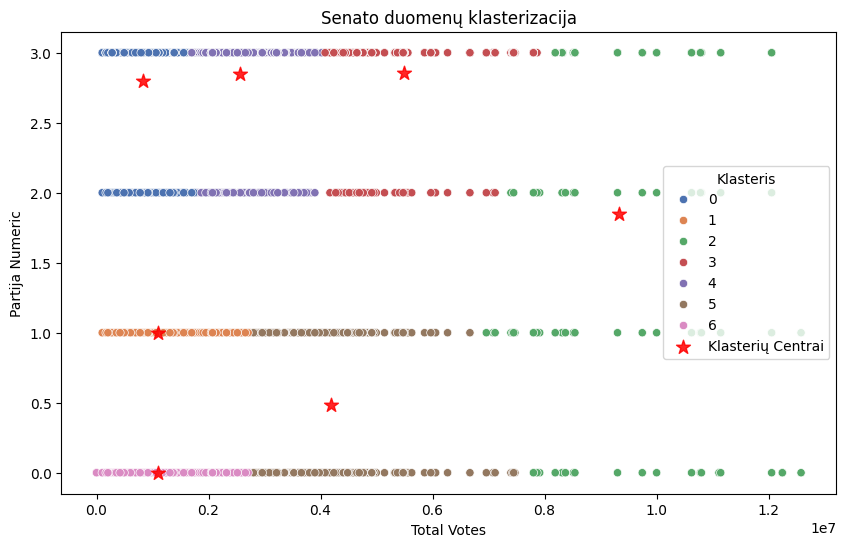

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric"]

# Paruoškite duomenis
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite K-means modelį
kmeans = KMeans(n_clusters=7, random_state=42)  # Nustatykite klasterių skaičių
kmeans.fit(X_scaled)

# Pridėkite klasterių priskyrimą į originalius duomenis
df["cluster"] = kmeans.labels_

# Atvirkštinė transformacija klasterių centrams į originalias reikšmes
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="partija_numeric", hue="cluster", palette="deep")
plt.title("Senato duomenų klasterizacija")
plt.xlabel("Total Votes")
plt.ylabel("Partija Numeric")

# Pridėkite klasterių centrus prie grafiko
centers_x, centers_y = centers_original[:, 0], centers_original[:, 1]
plt.scatter(centers_x, centers_y, c="red", s=110, alpha=0.85, marker="*", label="Klasterių Centrai")

plt.legend(title="Klasteris")
plt.show()


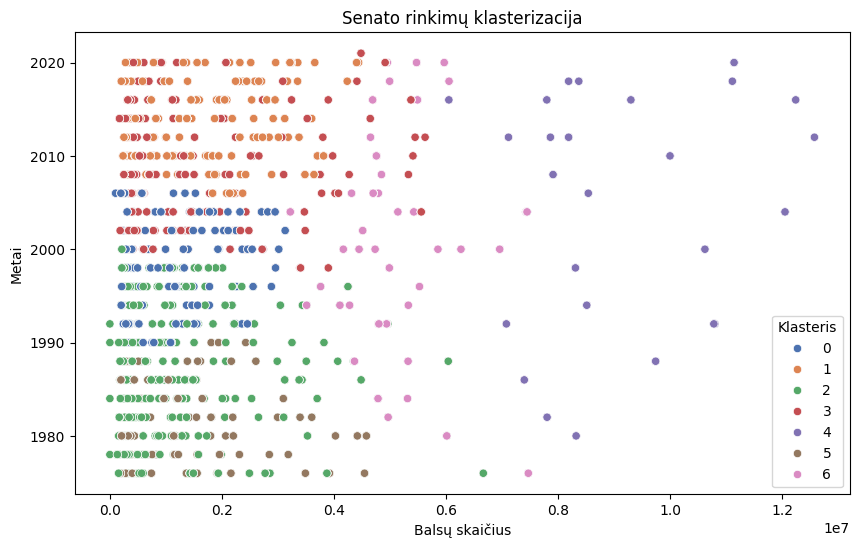

In [ ]:
df = pd.read_csv("1976-2020-senate.csv")

# Naudojame bendrą balsų skaičių, laimėjusios partijos skaitinę reikšmę ir metus
features = ["totalvotes", "partija_numeric", "year"]

# Paruoškite duomenis
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

options = range(2, 11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

# 6. Klasterizacija su pasirinktu klasterių skaičiumi (pvz., 4)
kmeans = KMeans(n_clusters=7, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# 7. Vizualizuokite klasterius (pvz., naudodami totalvotes ir year)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="year", hue="cluster", palette="deep")
plt.title("Senato rinkimų klasterizacija")
plt.xlabel("Balsų skaičius")
plt.ylabel("Metai")
plt.legend(title="Klasteris")
plt.show()


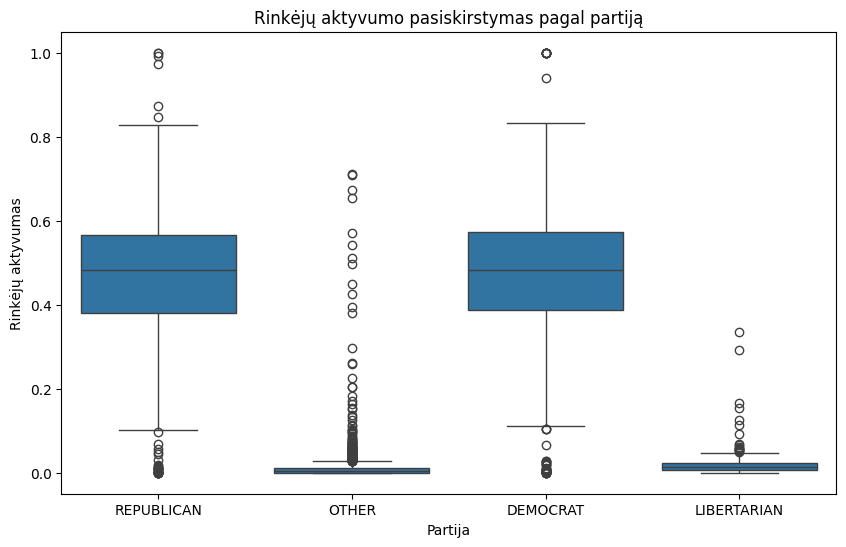

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sukurkite dėžės grafiką, kuris parodo rinkėjų aktyvumo pasiskirstymą pagal partiją
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="party_simplified", y="kandidato_aktyvumas")
plt.title("Rinkėjų aktyvumo pasiskirstymas pagal partiją")
plt.xlabel("Partija")
plt.ylabel("Rinkėjų aktyvumas")
plt.show()


In [ ]:
# 1. Įkelkite duomenis
df1 = pd.read_csv("1976-2020-senate.csv")

# 2. Sukurkite naują stulpelį "kandidato_aktyvumas", kuris rodo santykį tarp kandidato balsų ir bendro balsų skaičiaus
df1["kandidato_aktyvumas"] = df1["candidatevotes"] / df1["totalvotes"]

# 3. Patikrinkite, ar naujas stulpelis pridėtas teisingai
print(df1[["candidatevotes", "totalvotes", "kandidato_aktyvumas"]].head())

# 4. (Pasirinktinai) Išsaugokite atnaujintus duomenis atgal į CSV failą
df1.to_csv("1976-2020-senate.csv", index=False)


   candidatevotes  totalvotes  kandidato_aktyvumas
0          321236      741210             0.433394
1            1565      741210             0.002111
2          400334      741210             0.540109
3            7310      741210             0.009862
4           10765      741210             0.014524


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Pasirinkite požymius (features)
features = ["totalvotes", "year", "partija_numeric", "kandidato_aktyvumas"]
X = df1[features]

# Tikslinis kintamasis (labels)
y = df1["partija_numeric"]

# Padalinkite duomenis į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sukurkite ir treniruokite Random Forest klasifikatorių
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prognozuokite rezultatus ir įvertinkite tikslumą
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Modelio tikslumas: {accuracy:.2f}")
print("Klasifikacijos ataskaita:")
print(classification_report(y_test, y_pred))


Modelio tikslumas: 1.00
Klasifikacijos ataskaita:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       243
           2       1.00      1.00      1.00       111
           3       1.00      1.00      1.00       495

    accuracy                           1.00      1089
   macro avg       1.00      1.00      1.00      1089
weighted avg       1.00      1.00      1.00      1089



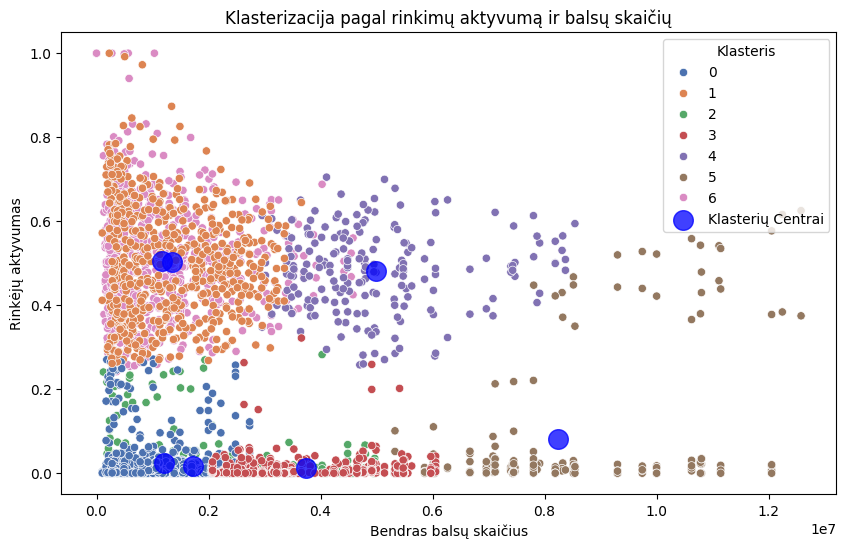

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pasirinkite požymius klasterizacijai
features = ["totalvotes", "kandidato_aktyvumas", "year"]
X = df[features]

# Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Atlikite klasterizaciją su K-means (pvz., 7 klasteriai)
kmeans = KMeans(n_clusters=7, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Atvirkštinė transformacija klasterių centrams į originalias reikšmes
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Vizualizuokite klasterius
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="kandidato_aktyvumas", hue="cluster", palette="deep")
plt.title("Klasterizacija pagal rinkimų aktyvumą ir balsų skaičių")
plt.xlabel("Bendras balsų skaičius")
plt.ylabel("Rinkėjų aktyvumas")

# Pridėkite klasterių centrus prie grafiko (naudojant atvirkštines koordinates)
centers_x, centers_y = centers_original[:, 0], centers_original[:, 1]
plt.scatter(centers_x, centers_y, c="blue", s=200, alpha=0.75, marker="o", label="Klasterių Centrai")

plt.legend(title="Klasteris")
plt.show()


cluster
0    3629
Name: count, dtype: int64


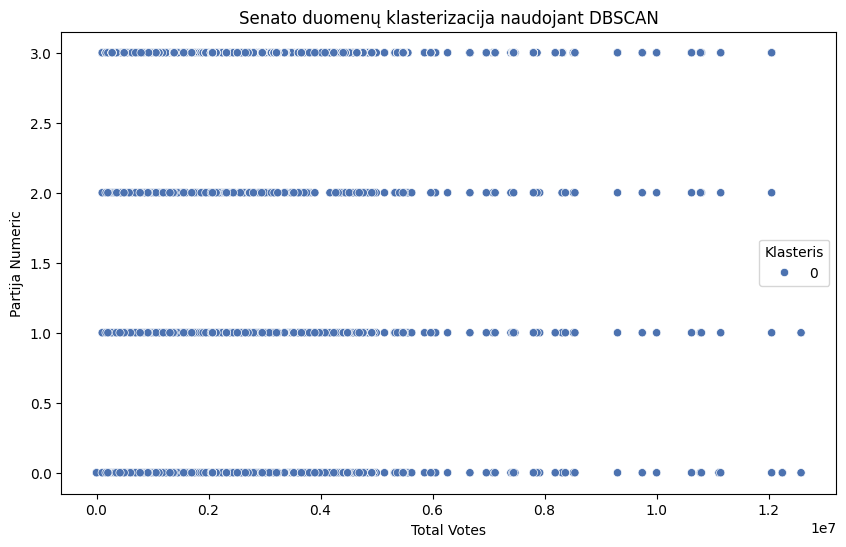

In [ ]:

from sklearn.cluster import DBSCAN

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite DBSCAN modelį
dbscan_model = DBSCAN(eps=1.1, min_samples=4)
df["cluster"] = dbscan_model.fit_predict(X_scaled)

# DBSCAN priskiria -1 taškams, kurie yra laikomi "triukšmu" arba išskirtinėmis reikšmėmis
print(df["cluster"].value_counts())

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="partija_numeric", hue="cluster", palette="deep", legend="full")
plt.title("Senato duomenų klasterizacija naudojant DBSCAN")
plt.xlabel("Total Votes")
plt.ylabel("Partija Numeric")
plt.legend(title="Klasteris")
plt.show()


cluster
0    3629
Name: count, dtype: int64


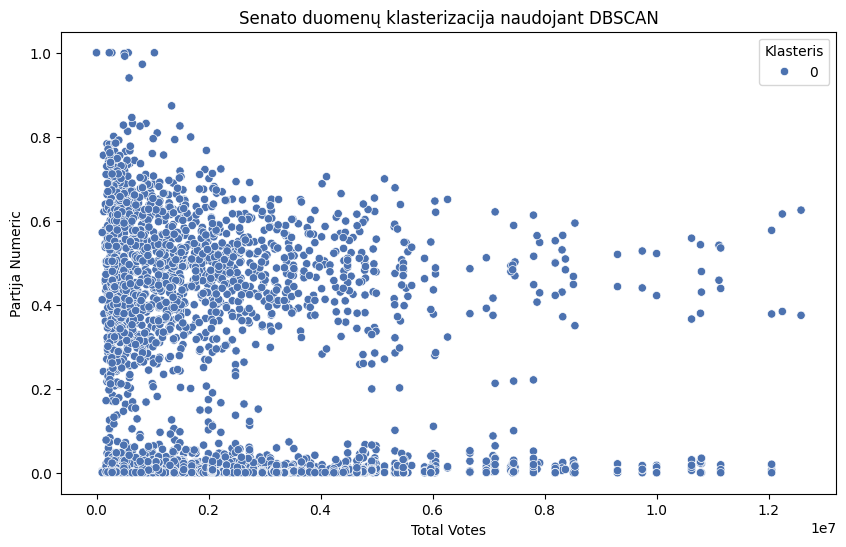

In [ ]:
# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "kandidato_aktyvumas" ]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite DBSCAN modelį
dbscan_model = DBSCAN(eps=1.1, min_samples=4)
df["cluster"] = dbscan_model.fit_predict(X_scaled)

# DBSCAN priskiria -1 taškams, kurie yra laikomi "triukšmu" arba išskirtinėmis reikšmėmis
print(df["cluster"].value_counts())

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="kandidato_aktyvumas", hue="cluster", palette="deep", legend="full")
plt.title("Senato duomenų klasterizacija naudojant DBSCAN")
plt.xlabel("Total Votes")
plt.ylabel("Partija Numeric")
plt.legend(title="Klasteris")
plt.show()


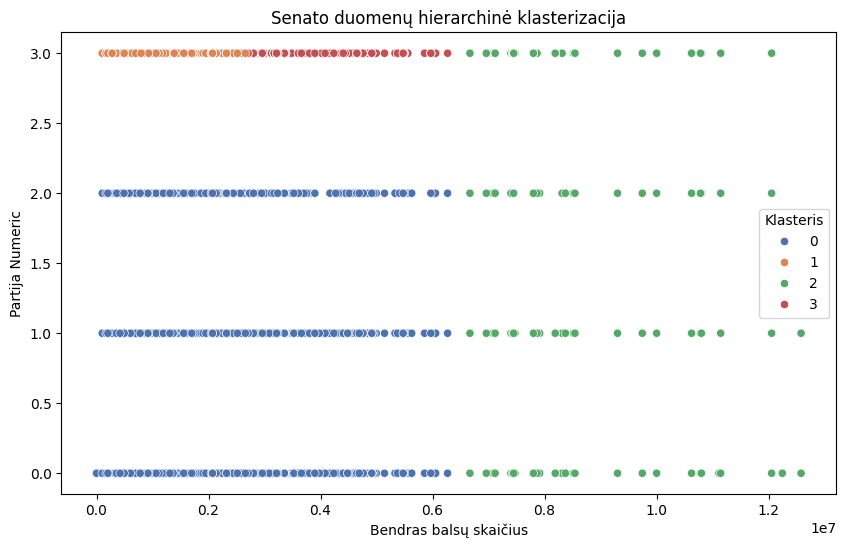

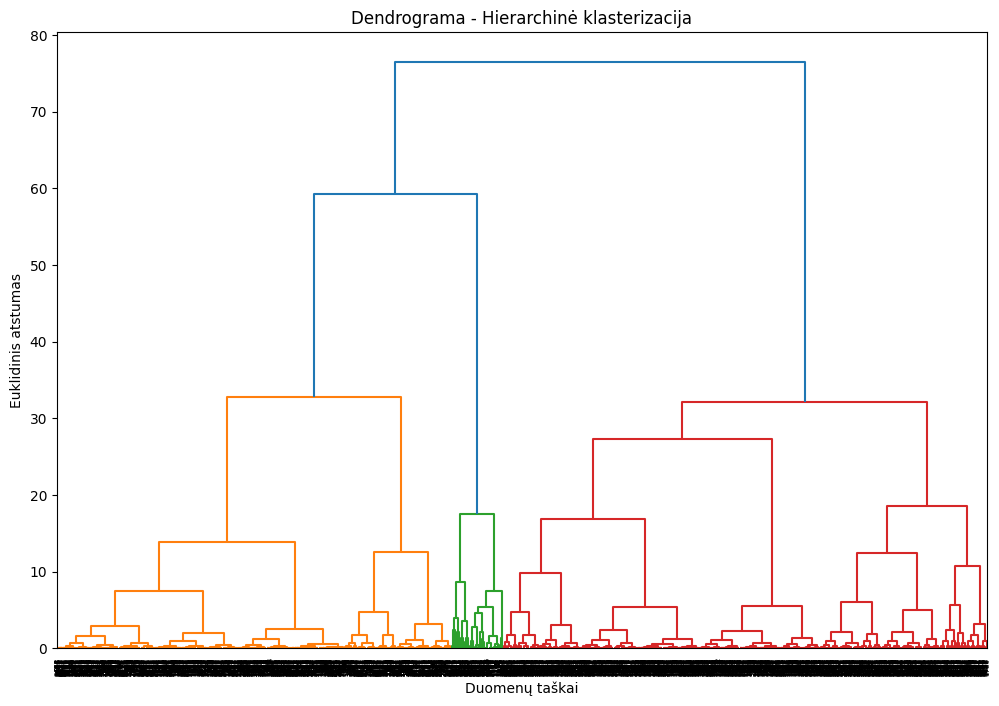

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Hierarchinė klasterizacija (pvz., su 4 klasteriais)
hierarchical_model = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
df["cluster"] = hierarchical_model.fit_predict(X_scaled)

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="partija_numeric", hue="cluster", palette="deep")
plt.title("Senato duomenų hierarchinė klasterizacija")
plt.xlabel("Bendras balsų skaičius")
plt.ylabel("Partija Numeric")
plt.legend(title="Klasteris")
plt.show()

# 6. Sukurkite dendrogramą, kad pamatytumėte hierarchinę struktūrą
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=True)
plt.title("Dendrograma - Hierarchinė klasterizacija")
plt.xlabel("Duomenų taškai")
plt.ylabel("Euklidinis atstumas")
plt.show()


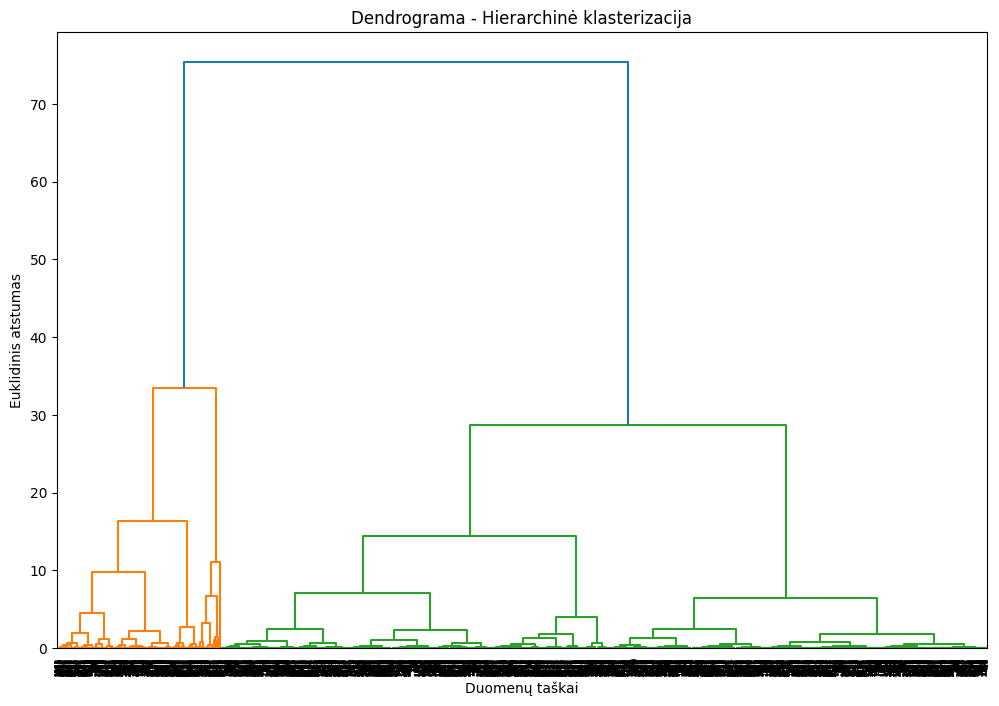

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes",]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Hierarchinė klasterizacija (pvz., naudojant Ward metodą)
linked = linkage(X_scaled, method="ward")

# 5. Sukurkite dendrogramą
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=True)
plt.title("Dendrograma - Hierarchinė klasterizacija")
plt.xlabel("Duomenų taškai")
plt.ylabel("Euklidinis atstumas")
plt.show()


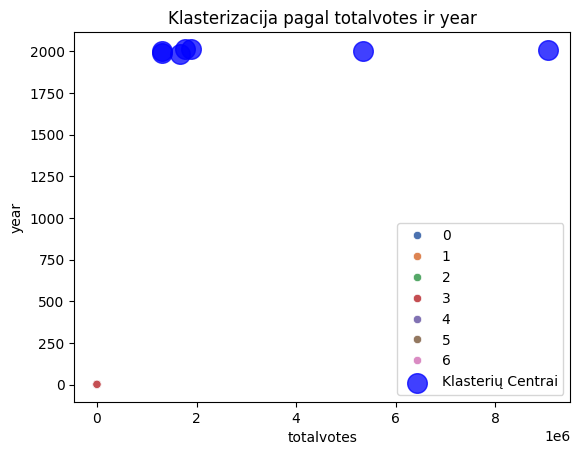

In [ ]:
# 1. Įkelkite Senato duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "year"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite K-means modelį
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)

# Atnaujinta funkcija, skirta atvaizduoti klasterius ir centrus
def plot_centroids(model, data, x_name, y_name):
    # Sukurti prognozes ir atkurti `DataFrame`
    preds = model.fit_predict(data)
    data = pd.DataFrame(data, columns=features)

    # Scatter plot su Seaborn
    sns.scatterplot(data=data, x=x_name, y=y_name, hue=preds, palette="deep")

    # Pašalinti spalvų užrašus
    plt.legend(title="Klasteris", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Paversti klasterių centrus atgal į originalias koordinates ir atvaizduoti
    centers_original = scaler.inverse_transform(model.cluster_centers_)
    x = features.index(x_name)
    y = features.index(y_name)
    centers_x, centers_y = centers_original[:, x], centers_original[:, y]

    # Pridėti klasterių centrus
    plt.scatter(centers_x, centers_y, c="blue", s=200, alpha=0.75, marker="o", label="Klasterių Centrai")
    plt.title(f"Klasterizacija pagal {x_name} ir {y_name}")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()

# Pritaikykite funkciją, pvz., su požymiais "totalvotes" ir "year"
plot_centroids(kmeans, X_scaled, "totalvotes", "year")



In [ ]:
def plot_centroids(model, data, x_name, y_name):
    preds = model.fit_predict(data)
    sns.scatterplot(data=X, x=x_name, y=y_name, hue=preds)
    x = data.columns.get_loc(x_name)
    y = data.columns.get_loc(y_name)
    centers_x, centers_y = model.cluster_centers_[:,x], model.cluster_centers_[:,y]
    plt.plot(centers_x, centers_y, "xb")
plot_centroids(model, X, "sepal_length", "petal_length")


NameError: name 'model' is not defined

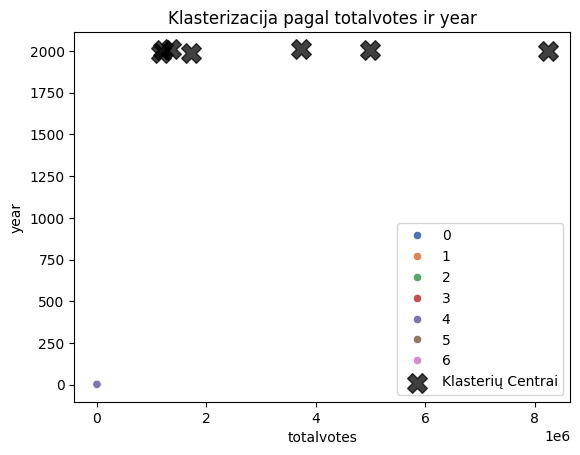

In [ ]:
# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "kandidato_aktyvumas", "year"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite K-means modelį
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)

# Atnaujinta funkcija, skirta atvaizduoti klasterius ir centrus
def plot_centroids(model, data, feature_names, x_name, y_name):
    # Sukurti prognozes ir sukurti `DataFrame` su skaitmeninėmis reikšmėmis
    preds = model.fit_predict(data)
    data_df = pd.DataFrame(data, columns=feature_names)
    data_df["cluster"] = preds

    # Sukurti scatter plot su Seaborn
    sns.scatterplot(data=data_df, x=x_name, y=y_name, hue="cluster", palette="deep")

    # Paversti klasterių centrus atgal į originalias koordinates
    centers_original = scaler.inverse_transform(model.cluster_centers_)
    x_index = feature_names.index(x_name)
    y_index = feature_names.index(y_name)
    centers_x, centers_y = centers_original[:, x_index], centers_original[:, y_index]

    # Pridėti klasterių centrus
    plt.scatter(centers_x, centers_y, c="black", s=200, alpha=0.75, marker="X", label="Klasterių Centrai")
    plt.title(f"Klasterizacija pagal {x_name} ir {y_name}")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()

# Pritaikykite funkciją, pvz., su požymiais "totalvotes" ir "year"
plot_centroids(kmeans, X_scaled, features, "totalvotes", "year")



PCA su 2 komponentais
 dispersija: 0.64
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       240
           1       0.58      0.53      0.55       243
           2       0.54      0.24      0.34       111
           3       0.81      0.94      0.87       495

    accuracy                           0.71      1089
   macro avg       0.64      0.59      0.60      1089
weighted avg       0.70      0.71      0.70      1089


PCA su 3 komponentais
 dispersija: 0.82
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       240
           1       0.98      1.00      0.99       243
           2       1.00      0.96      0.98       111
           3       0.99      1.00      1.00       495

    accuracy                           0.99      1089
   macro avg       0.99      0.99      0.99      1089
weighted avg       0.99      0.99      0.99      1089


PCA su 4 komponentais
 dispersija: 0.99
       

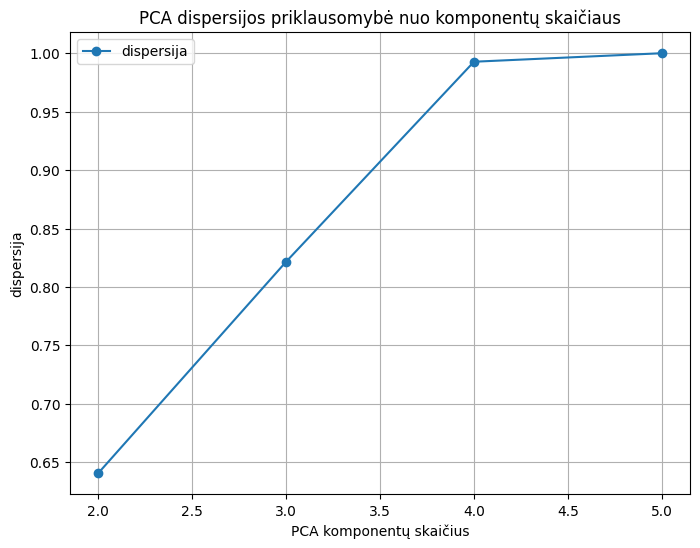

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Įkelkite Senato rinkimų duomenis
df = pd.read_csv("1976-2020-senate.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "year", "state_cen", "state_ic"]
X = df[features]
y = df["partija_numeric"]  # Naudokime partijos informaciją kaip tikslinę reikšmę klasifikacijai

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA taikymas ir skirtingų komponentų skaičių bandymas
explained_variances = []
for n_components in [2, 3, 4, 5]:  # Bandykime skirtingą komponentų skaičių
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Išveskite PCA paaiškintą dispersiją
    explained_variances.append(sum(pca.explained_variance_ratio_))

    # Sukurkite treniravimo ir testavimo rinkinius
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    # 5. Treniravimo modelis su RandomForestClassifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Testavimas ir rezultatai
    y_pred = clf.predict(X_test)
    print(f"\nPCA su {n_components} komponentais")
    print(f" dispersija: {sum(pca.explained_variance_ratio_):.2f}")
    print(classification_report(y_test, y_pred))

# 6. Paaiškintos dispersijos vizualizacija
plt.figure(figsize=(8, 6))
components = [2, 3, 4, 5]
plt.plot(components, explained_variances, "-o", label="dispersija")
plt.xlabel("PCA komponentų skaičius")
plt.ylabel("dispersija")
plt.title("PCA dispersijos priklausomybė nuo komponentų skaičiaus")
plt.grid(True)
plt.legend()
plt.show()


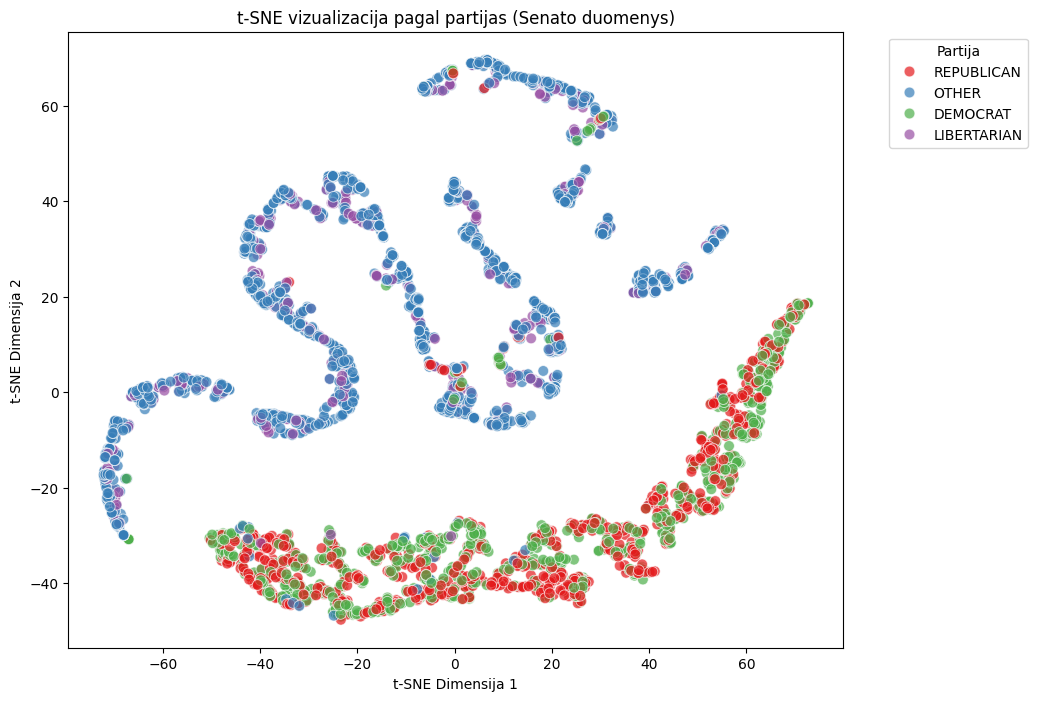

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

# Nurodykite failo kelią su Senato duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Pasirenkame tik svarbius stulpelius, pvz., kandidatų balsai ir bendras balsų skaičius
senato_duomenys_filtruoti = senato_duomenys[["candidatevotes", "totalvotes"]].dropna()

# Normalizuojame duomenis, kad t-SNE veiktų efektyviau
senato_duomenys_filtruoti = (senato_duomenys_filtruoti - senato_duomenys_filtruoti.mean()) / senato_duomenys_filtruoti.std()

# Pritaikome t-SNE (n_components=2 reiškia, kad sumažinsime duomenis iki dviejų dimensijų)
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(senato_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į pradinį duomenų rinkinį
senato_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
senato_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Vizualizuojame t-SNE rezultatus
plt.figure(figsize=(10, 8))
sns.scatterplot(x="tsne_dim1", y="tsne_dim2", hue="party_simplified", data=senato_duomenys, palette="Set1", s=60, alpha=0.7)
plt.title("t-SNE vizualizacija pagal partijas (Senato duomenys)")
plt.xlabel("t-SNE Dimensija 1")
plt.ylabel("t-SNE Dimensija 2")
plt.legend(title="Partija", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

# Nurodykite failo kelią su Senato duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Pasirenkame tik skaitinius stulpelius, pvz., "candidatevotes" ir "totalvotes"
senato_duomenys_filtruoti = senato_duomenys[["candidatevotes", "totalvotes"]].dropna()

# Normalizuojame duomenis
senato_duomenys_filtruoti = (senato_duomenys_filtruoti - senato_duomenys_filtruoti.mean()) / senato_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(senato_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
senato_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
senato_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su Plotly
fig = px.scatter(senato_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified",
                 hover_data={"year": True, "state": True, "candidate": True},
                 title="Interaktyvi t-SNE Vizualizacija Senato Rinkimų Duomenims")
fig.update_layout(xaxis_title="t-SNE Dimensija 1", yaxis_title="t-SNE Dimensija 2")
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

# Nurodykite failo kelią su Senato duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

senato_duomenys_filtruoti = senato_duomenys[["candidatevotes", "kandidato_aktyvumas", ]].dropna()

# Normalizuojame duomenis
senato_duomenys_filtruoti = (senato_duomenys_filtruoti - senato_duomenys_filtruoti.mean()) / senato_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(senato_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
senato_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
senato_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su Plotly
fig = px.scatter(senato_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified",
                 hover_data={"year": True, "state": True, "candidate": True},
                 title="Interaktyvi t-SNE Vizualizacija Senato Rinkimų Duomenims")
fig.update_layout(xaxis_title="t-SNE Dimensija 1", yaxis_title="t-SNE Dimensija 2")
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

# Nurodykite failo kelią su Senato duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Pasirenkame tik skaitinius stulpelius, pvz., "candidatevotes" ir "totalvotes"
senato_duomenys_filtruoti = senato_duomenys[["candidatevotes", "totalvotes"]].dropna()

# Normalizuojame duomenis, kad t-SNE būtų efektyvesnis
senato_duomenys_filtruoti = (senato_duomenys_filtruoti - senato_duomenys_filtruoti.mean()) / senato_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(senato_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
senato_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
senato_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su visais pagrindiniais stulpeliais
fig = px.scatter(
    senato_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified",
    hover_data={
        "candidate": True,
        "party_detailed": True,
        "state": True,
        "year": True,
        "candidatevotes": True,
        "totalvotes": True,
        "writein": True,
        "office": True,
        "party_simplified": False  # Šis rodiklis jau atvaizduojamas per "color"
    },
    size="candidatevotes",  # Kandidato balsų skaičius kaip taško dydis
    title="Interaktyvi t-SNE Vizualizacija su Visomis Galimomis Reikšmėmis (Senato Rinkimai)"
)

# Pakeičiame ašių pavadinimus
fig.update_layout(
    xaxis_title="t-SNE Dimensija 1",
    yaxis_title="t-SNE Dimensija 2"
)

# Rodymas
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

# Nurodykite failo kelią su Senato duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Pasirenkame tik skaitinius stulpelius, kurie yra faile
stulpeliai_analizei = [
    "candidatevotes", "totalvotes", "year", "state_fips", "state_cen",
    "state_ic"
]
senato_duomenys_filtruoti = senato_duomenys[stulpeliai_analizei].dropna()

# Normalizuojame duomenis, kad t-SNE būtų efektyvesnis
senato_duomenys_filtruoti = (senato_duomenys_filtruoti - senato_duomenys_filtruoti.mean()) / senato_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(senato_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
senato_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
senato_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su visais pagrindiniais stulpeliais
fig = px.scatter(
    senato_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified",
    hover_data={
        "candidate": True,
        "party_detailed": True,
        "state": True,
        "year": True,
        "candidatevotes": True,
        "totalvotes": True,
        "state_fips": True,
        "state_cen": True,
        "state_ic": True,
        "writein": True,
        "office": True,
        "party_simplified": False
    },
    size="candidatevotes",  # Kandidato balsų skaičius kaip taško dydis
    title="Interaktyvi t-SNE Vizualizacija su Kuo Daugiau Skaitinių Stulpelių (Senato Rinkimai)"
)

# Pakeičiame ašių pavadinimus
fig.update_layout(
    xaxis_title="t-SNE Dimensija 1",
    yaxis_title="t-SNE Dimensija 2"
)

# Rodymas
fig.show()


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Nurodykite failo kelią su Senato rinkimų duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Pasirenkame savybes (features) ir tikslinę reikšmę
features = ["totalvotes", "year", "state_fips", "state_cen", "state_ic"]
target = "candidatevotes"

# Išmetame eilutes su trūkstamomis reikšmėmis
senato_duomenys = senato_duomenys.dropna(subset=features + [target])

# Paruošiame savybes (X) ir tikslinę reikšmę (y)
X = senato_duomenys[features]
y = senato_duomenys[target]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame ir treniruojame XGBoost modelį
modelis = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000,
                       learning_rate=0.2, max_depth=10, subsample=0.9,
                       colsample_bytree=0.7)
modelis.fit(X_train, y_train)

# Atlikime prognozes
y_pred = modelis.predict(X_test)

# Įvertinkime modelio tikslumą
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 521795.987407926


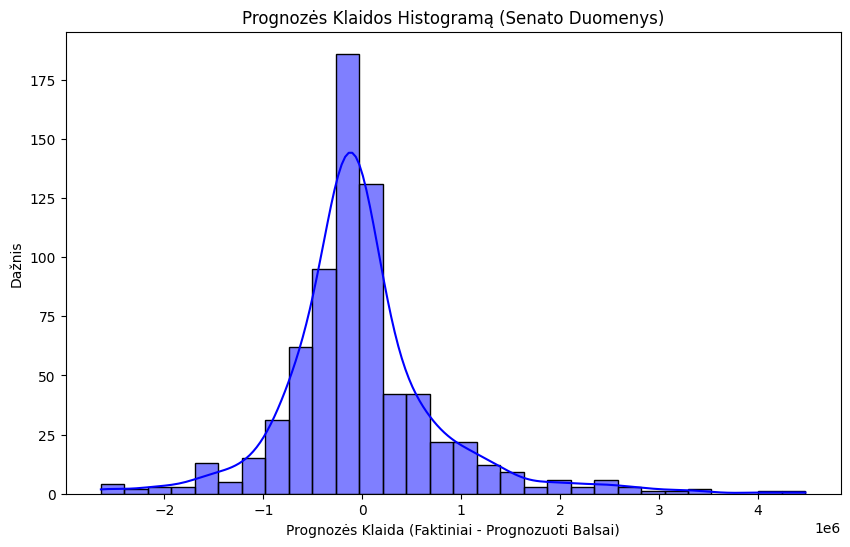

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# Histogramos vizualizacija: klaidų pasiskirstymas
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color="blue", bins=30)
plt.xlabel("Prognozės Klaida (Faktiniai - Prognozuoti Balsai)")
plt.ylabel("Dažnis")
plt.title("Prognozės Klaidos Histogramą (Senato Duomenys)")
plt.show()

# Interaktyvi Palyginimo Diagrama su Plotly
fig = go.Figure()

# Faktiniai balsai
fig.add_trace(go.Scatter(
    x=list(range(len(y_test))), y=y_test, mode="lines+markers", name="Faktiniai Balsai"
))

# Prognozuoti balsai
fig.add_trace(go.Scatter(
    x=list(range(len(y_pred))), y=y_pred, mode="lines+markers", name="Prognozuoti Balsai"
))

fig.update_layout(
    title="Faktiniai vs. Prognozuoti Balsai (Senato Duomenys)",
    xaxis_title="Eilutės Numeris (Testiniai Duomenys)",
    yaxis_title="Balsų Skaičius",
    legend=dict(x=0.1, y=0.9)
)

fig.show()


<Figure size 2000x1000 with 0 Axes>

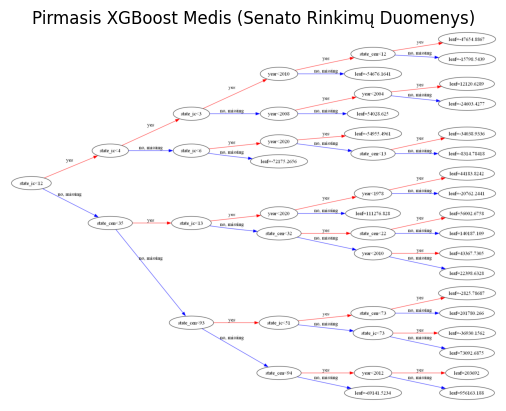

<Figure size 2000x1000 with 0 Axes>

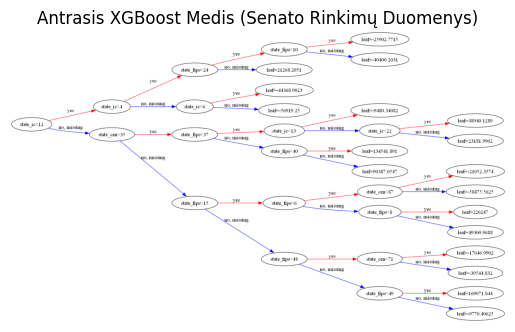

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_tree

# Nurodykite failo kelią su Senato rinkimų duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Pasirenkame savybes (features) ir tikslinę reikšmę
features = ["totalvotes", "year", "state_fips", "state_cen", "state_ic"]
target = "candidatevotes"

# Išmetame eilutes su trūkstamomis reikšmėmis
senato_duomenys = senato_duomenys.dropna(subset=features + [target])

# Paruošiame savybes (X) ir tikslinę reikšmę (y)
X = senato_duomenys[features]
y = senato_duomenys[target]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame ir treniruojame XGBoost modelį
modelis = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=100,
                       learning_rate=0.2, max_depth=5, subsample=0.9,
                       colsample_bytree=0.7)
modelis.fit(X_train, y_train)

# Vizualizuojame pirmąjį medį
plt.figure(figsize=(20, 10))
plot_tree(modelis, num_trees=0, rankdir="LR")  # num_trees=0 reiškia pirmasis medis
plt.title("Pirmasis XGBoost Medis (Senato Rinkimų Duomenys)")
plt.show()

# Vizualizuojame antrąjį medį (pvz., num_trees=1)
plt.figure(figsize=(20, 10))
plot_tree(modelis, num_trees=1, rankdir="LR")
plt.title("Antrasis XGBoost Medis (Senato Rinkimų Duomenys)")
plt.show()


C:\Users\Paulius\AppData\Local\Temp\ipykernel_15536\3582829992.py:14: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  senato_duomenys['winner'] = senato_duomenys.groupby(['year', 'state'])['candidatevotes'].transform(max) == senato_duomenys['candidatevotes']


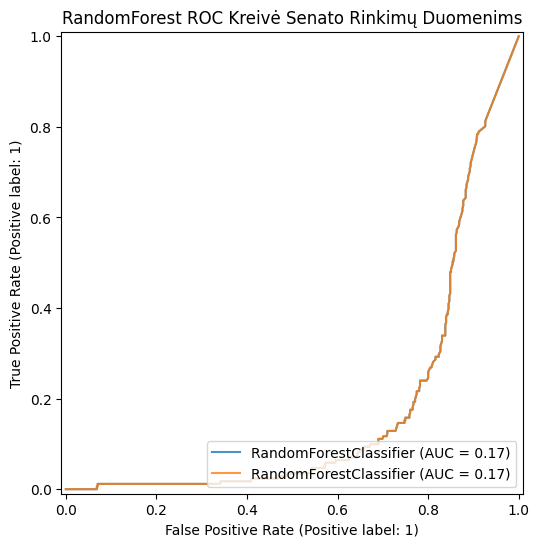

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split

# Nurodykite failo kelią su Senato rinkimų duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Sukuriame binarinį tikslinį stulpelį "winner", kuris nurodo, ar kandidatas laimėjo
senato_duomenys["winner"] = senato_duomenys.groupby(["year", "state"])["candidatevotes"].transform(max) == senato_duomenys["candidatevotes"]
senato_duomenys["winner"] = senato_duomenys["winner"].astype(int)  # Konvertuojame į binarinį formatą (1 = laimėtojas, 0 = nelaimėtojas)

# Pasirenkame savybes (features) ir tikslinę reikšmę (target)
features = ["totalvotes", "year", "state_fips", "state_cen", "state_ic"]
target = "winner"

# Pašaliname trūkstamas reikšmes
senato_duomenys = senato_duomenys.dropna(subset=features + [target])

# Paruošiame savybes (X) ir tikslinę reikšmę (y)
X = senato_duomenys[features]
y = senato_duomenys[target]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame ir treniruojame RandomForest modelį
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Braižome ROC kreivę
fig, ax = plt.subplots(figsize=(8, 6))
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.title("RandomForest ROC Kreivė Senato Rinkimų Duomenims")
plt.show()


C:\Users\Paulius\AppData\Local\Temp\ipykernel_5264\371449111.py:17: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  senato_duomenys['winner'] = senato_duomenys.groupby(['year', 'state'])['candidatevotes'].transform(max) == senato_duomenys['candidatevotes']
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

Modelio tikslumas: 0.76
Ataskaita apie klasifikaciją:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       555
           1       0.00      0.00      0.00       171

    accuracy                           0.76       726
   macro avg       0.38      0.50      0.43       726
weighted avg       0.58      0.76      0.66       726



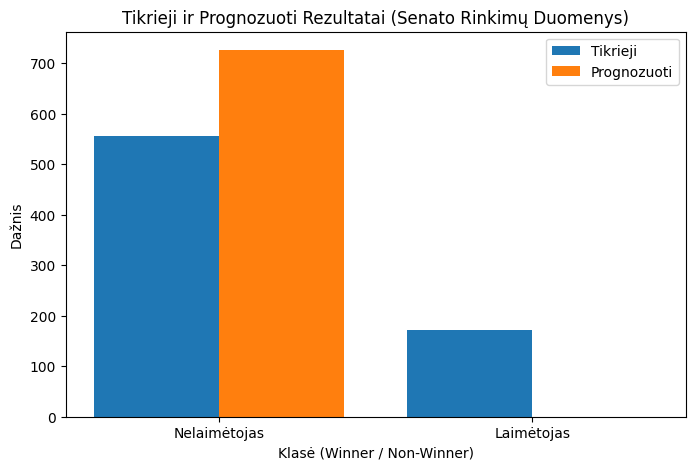

In [ ]:
# Žingsnis 1: Bibliotekų Importavimas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Žingsnis 2: Duomenų Paruošimas
# Nurodykite failo kelią su Senato rinkimų duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Sukuriame binarinį tikslinį stulpelį "winner", kuris nurodo, ar kandidatas laimėjo
senato_duomenys["winner"] = senato_duomenys.groupby(["year", "state"])["candidatevotes"].transform(max) == senato_duomenys["candidatevotes"]
senato_duomenys["winner"] = senato_duomenys["winner"].astype(int)  # Konvertuojame į binarinį formatą (1 = laimėtojas, 0 = nelaimėtojas)

# Pasirenkame savybes (features) ir tikslinę reikšmę (target)
features = ["totalvotes", "year", "state_fips", "state_cen", "state_ic"]
target = "winner"

# Pašaliname trūkstamas reikšmes
senato_duomenys = senato_duomenys.dropna(subset=features + [target])

# Paruošiame savybes (X) ir tikslinę reikšmę (y)
X = senato_duomenys[features]
y = senato_duomenys[target]

# Žingsnis 3: Duomenų Padalijimas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Žingsnis 4: MLP Modelio Sukūrimas ir Treniruotė
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Žingsnis 5: Modelio Vertinimas
# Prognozuojame testavimo duomenis
y_pred = mlp_classifier.predict(X_test)

# Apskaičiuojame tikslumą
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelio tikslumas: {accuracy:.2f}")

# Pateikiame išsamesnę ataskaitą
print("Ataskaita apie klasifikaciją:")
print(classification_report(y_test, y_pred))

# Žingsnis 6: Rezultato Vizualizacija
# Histogramos vizualizacija prognozėms
plt.figure(figsize=(8, 5))
plt.hist([y_test, y_pred], bins=np.arange(3)-0.5, rwidth=0.8, label=["Tikrieji", "Prognozuoti"])
plt.xlabel("Klasė (Winner / Non-Winner)")
plt.ylabel("Dažnis")
plt.title("Tikrieji ir Prognozuoti Rezultatai (Senato Rinkimų Duomenys)")
plt.xticks([0, 1], ["Nelaimėtojas", "Laimėtojas"])
plt.legend()
plt.show()

C:\Users\Paulius\AppData\Local\Temp\ipykernel_5264\2773081994.py:19: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  senato_duomenys['winner'] = senato_duomenys.groupby(['year', 'state'])['candidatevotes'].transform(max) == senato_duomenys['candidatevotes']


Modelio tikslumas: 0.76
Klasifikacijos ataskaita:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       555
           1       0.33      0.01      0.01       171

    accuracy                           0.76       726
   macro avg       0.55      0.50      0.44       726
weighted avg       0.66      0.76      0.66       726



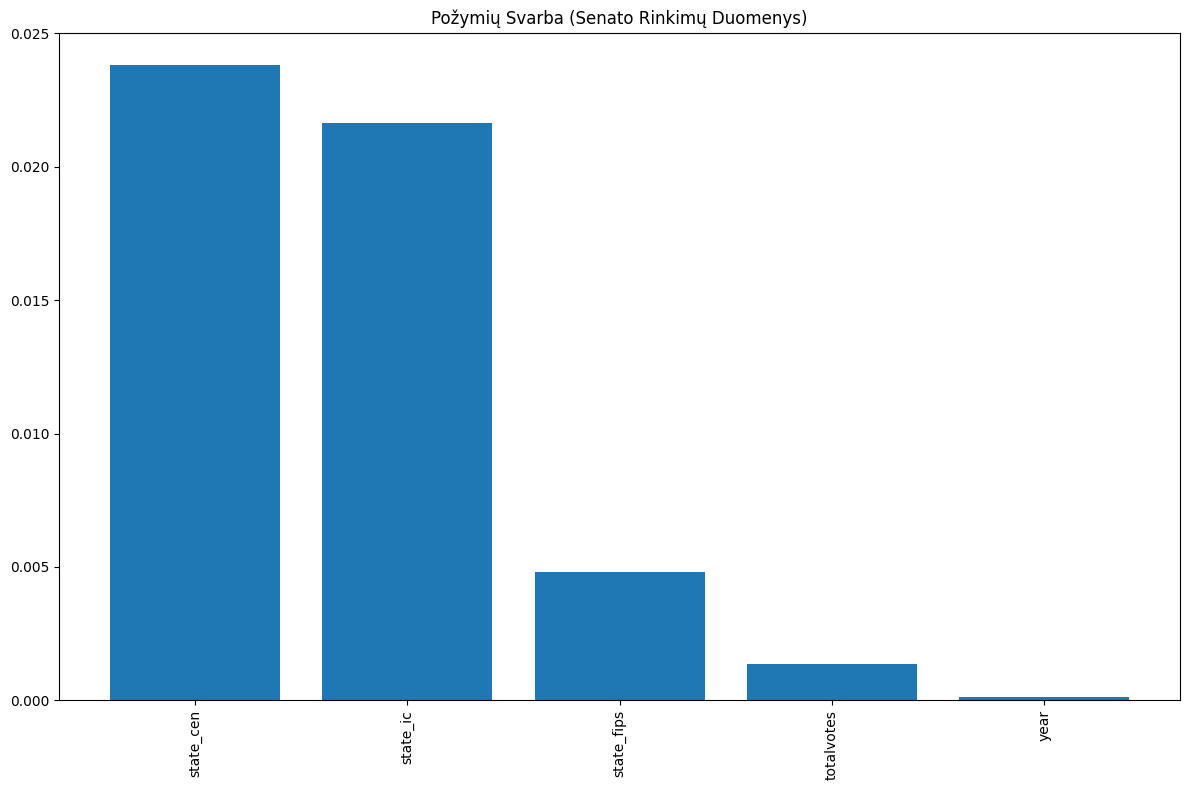

In [ ]:
# Importuojame reikalingas bibliotekas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Nurodykite failo kelią su Senato rinkimų duomenimis
senato_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-senate.csv"

# Nuskaitome duomenis
senato_duomenys = pd.read_csv(senato_failo_kelias)

# Sukuriame binarinį tikslinį stulpelį "winner", kuris nurodo, ar kandidatas laimėjo
senato_duomenys["winner"] = senato_duomenys.groupby(["year", "state"])["candidatevotes"].transform(max) == senato_duomenys["candidatevotes"]
senato_duomenys["winner"] = senato_duomenys["winner"].astype(int)  # Konvertuojame į binarinį formatą (1 = laimėtojas, 0 = nelaimėtojas)

# Pasirenkame savybes (features) ir tikslinę reikšmę (target)
features = ["totalvotes", "year", "state_fips", "state_cen", "state_ic"]
target = "winner"

# Pašaliname trūkstamas reikšmes
senato_duomenys = senato_duomenys.dropna(subset=features + [target])
X = senato_duomenys[features]
y = senato_duomenys[target]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame duomenų apdorojimo ir modeliavimo srautą su Pipeline
mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("classifier", MLPClassifier(max_iter=1000, random_state=42))
])

# Treniruojame modelį su mokymo duomenimis
mlp_pipeline.fit(X_train, y_train)

# Prognozuojame ir vertiname modelį
y_pred = mlp_pipeline.predict(X_test)
print(f"Modelio tikslumas: {accuracy_score(y_test, y_pred):.2f}")
print("Klasifikacijos ataskaita:")
print(classification_report(y_test, y_pred))

# Požymių svarbos vertinimas
def features_importance(X_test, y_test, model):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importance = result.importances_mean

    # Požymių svarbos vizualizacija
    features = model["poly"].get_feature_names_out(input_features=X.columns)
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title("Požymių Svarba (Senato Rinkimų Duomenys)")
    plt.bar(range(X_test.shape[1]), importance[indices], align="center")
    plt.xticks(range(X_test.shape[1]), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Vizualizuojame požymių svarbą
features_importance(X_test, y_test, mlp_pipeline)


In [ ]:
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV

# Sukuriame parametrų paieškos erdvę MLP klasifikatoriui
param_grid = {
    "classifier__hidden_layer_sizes": [(50, 50), (100, 50), (100, 100)],
    "classifier__activation": ["tanh", "relu"],
    "classifier__solver": ["sgd", "adam"],
    "classifier__alpha": [0.0001, 0.05],
    "classifier__learning_rate": ["constant", "adaptive"],
}

# Nustatome GridSearchCV su 5 kryžminės patikros kartotėmis
grid_search = GridSearchCV(estimator=clone(mlp_pipeline), param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Paleidžiame paiešką su Senato rinkimų duomenų mokymo rinkiniu
grid_search.fit(X_train, y_train)

# Geriausi hiperparametrai
print("Geriausi Hiperparametrai:", grid_search.best_params_)
print("Geriausias Tikslumas:", grid_search.best_score_)

# Naudojame geriausią modelį prognozėms ir įvertiname testavimo rinkinyje
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Tikslumas ir klasifikacijos ataskaita testavimo rinkiniui
from sklearn.metrics import accuracy_score, classification_report

print(f"Modelio tikslumas su geriausiais hiperparametrais: {accuracy_score(y_test, y_pred):.2f}")
print("Klasifikacijos ataskaita su geriausiais hiperparametrais:")
print(classification_report(y_test, y_pred))


Geriausi Hiperparametrai: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'sgd'}
Geriausias Tikslumas: 0.7919395809840346
Modelio tikslumas su geriausiais hiperparametrais: 0.76
Klasifikacijos ataskaita su geriausiais hiperparametrais:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       555
           1       0.00      0.00      0.00       171

    accuracy                           0.76       726
   macro avg       0.38      0.50      0.43       726
weighted avg       0.58      0.76      0.66       726



c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera